### O UNION e o FULL JOIN no SQL
- Agora nosso banco de dados (BaseDados3) possui 3 tabelas:
    - alunos: Dados dos alunos da Hashtag
    - plataforma: Informações de acesso a plataforma
    - alunos_novos: Dados dos alunos que entraram após o início desse mês
- Base disponível em:
    - https://drive.google.com/file/d/1Hy8hOBMTBfdIx24iI_1kowNJFEDzM73Q/view?usp=sharing

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Criando a conexão
import sqlite3
con = sqlite3.connect('BaseDados3.db')

In [3]:
# Criando um cursor
cur = con.cursor()

In [4]:
# Criando uma função para consultar os dados
def executa_sql(comando):
    cur.execute(comando)
    resultado = cur.fetchall()
    resultado = pd.DataFrame(resultado)
    if resultado.shape[1] > 0:
        resultado.columns = [i[0] for i in cur.description]
    print(resultado.shape)
    display(resultado.head())
    return resultado

In [5]:
# Visualizando a tabela alunos
alunos = executa_sql("SELECT * FROM alunos")

(21, 4)


,id_aluno,nome_aluno,cod_matricula,e-mail
0,1,Maria Eduarda da Rocha,38273,maria@hashtag.com
1,2,Bárbara da Cunha,63546,barbara@hashtag.com
2,3,Kevin Melo,80515,kevin@hashtag.com
3,4,Pedro Henrique da Costa,68004,pedro@hashtag.com
4,5,Mirella Viana,28421,mirella@hashtag.com


In [6]:
display(alunos)

,id_aluno,nome_aluno,cod_matricula,e-mail
0,1,Maria Eduarda da Rocha,38273,maria@hashtag.com
1,2,Bárbara da Cunha,63546,barbara@hashtag.com
2,3,Kevin Melo,80515,kevin@hashtag.com
3,4,Pedro Henrique da Costa,68004,pedro@hashtag.com
4,5,Mirella Viana,28421,mirella@hashtag.com
5,6,Lívia Jesus,22284,lívia@hashtag.com
6,7,Lara Lopes,38362,lara@hashtag.com
7,8,Lucca Cardoso,45109,lucca@hashtag.com
8,9,Isabelly Souza,31859,isabelly@hashtag.com
9,10,Cauã Porto,42674,cauã@hashtag.com


In [7]:
# Visualizando a tabela alunos_novos
alunos_novos = executa_sql("SELECT * FROM alunos_novos")

(4, 4)


,id_aluno,nome_aluno,cod_matricula,e-mail
0,1,Pedro Carlos,115640,pedro@hashtag.com
1,2,Beatriz Rezende,100310,bia@hashtag.com
2,3,Sheila Costa,112366,sheila@hashtag.com
3,21,Jorge Henrique Gomes,89791,jorge@hashtag.com


### O UNION
- Ele vai permitir unir as linhas de duas bases diferentes
- Para isso, é necessário que as duas bases **tenham o mesmo número de colunas** e que elas **sejam de tipos semelhantes**
- Por padrão, o `UNION` não irá repetir linhas iguais
- Ao utilizar o `UNION ALL`, vamos trazer **todos os valores das duas tabelas**, mesmo que repetidos

In [8]:
# Unindo as duas tabelas de alunos utilizando o UNION
alunos = executa_sql("SELECT * FROM alunos \
                     UNION \
                     SELECT * FROM alunos_novos")

(24, 4)


,id_aluno,nome_aluno,cod_matricula,e-mail
0,1,Maria Eduarda da Rocha,38273,maria@hashtag.com
1,1,Pedro Carlos,115640,pedro@hashtag.com
2,2,Beatriz Rezende,100310,bia@hashtag.com
3,2,Bárbara da Cunha,63546,barbara@hashtag.com
4,3,Kevin Melo,80515,kevin@hashtag.com


In [9]:
display(alunos)

,id_aluno,nome_aluno,cod_matricula,e-mail
0,1,Maria Eduarda da Rocha,38273,maria@hashtag.com
1,1,Pedro Carlos,115640,pedro@hashtag.com
2,2,Beatriz Rezende,100310,bia@hashtag.com
3,2,Bárbara da Cunha,63546,barbara@hashtag.com
4,3,Kevin Melo,80515,kevin@hashtag.com
5,3,Sheila Costa,112366,sheila@hashtag.com
6,4,Pedro Henrique da Costa,68004,pedro@hashtag.com
7,5,Mirella Viana,28421,mirella@hashtag.com
8,6,Lívia Jesus,22284,lívia@hashtag.com
9,7,Lara Lopes,38362,lara@hashtag.com


In [10]:
# Unindo as duas tabelas de alunos utilizando o UNION ALL
alunos = executa_sql("SELECT * FROM alunos \
                     UNION ALL \
                     SELECT * FROM alunos_novos")

(25, 4)


,id_aluno,nome_aluno,cod_matricula,e-mail
0,1,Maria Eduarda da Rocha,38273,maria@hashtag.com
1,2,Bárbara da Cunha,63546,barbara@hashtag.com
2,3,Kevin Melo,80515,kevin@hashtag.com
3,4,Pedro Henrique da Costa,68004,pedro@hashtag.com
4,5,Mirella Viana,28421,mirella@hashtag.com


In [11]:
display(alunos)

,id_aluno,nome_aluno,cod_matricula,e-mail
0,1,Maria Eduarda da Rocha,38273,maria@hashtag.com
1,2,Bárbara da Cunha,63546,barbara@hashtag.com
2,3,Kevin Melo,80515,kevin@hashtag.com
3,4,Pedro Henrique da Costa,68004,pedro@hashtag.com
4,5,Mirella Viana,28421,mirella@hashtag.com
5,6,Lívia Jesus,22284,lívia@hashtag.com
6,7,Lara Lopes,38362,lara@hashtag.com
7,8,Lucca Cardoso,45109,lucca@hashtag.com
8,9,Isabelly Souza,31859,isabelly@hashtag.com
9,10,Cauã Porto,42674,cauã@hashtag.com


### Utilizando o JOIN
- Para fazer o `JOIN` no SQL iremos fazer de uma forma muito similar ao merge que fizemos no pandas
- Relembrando:
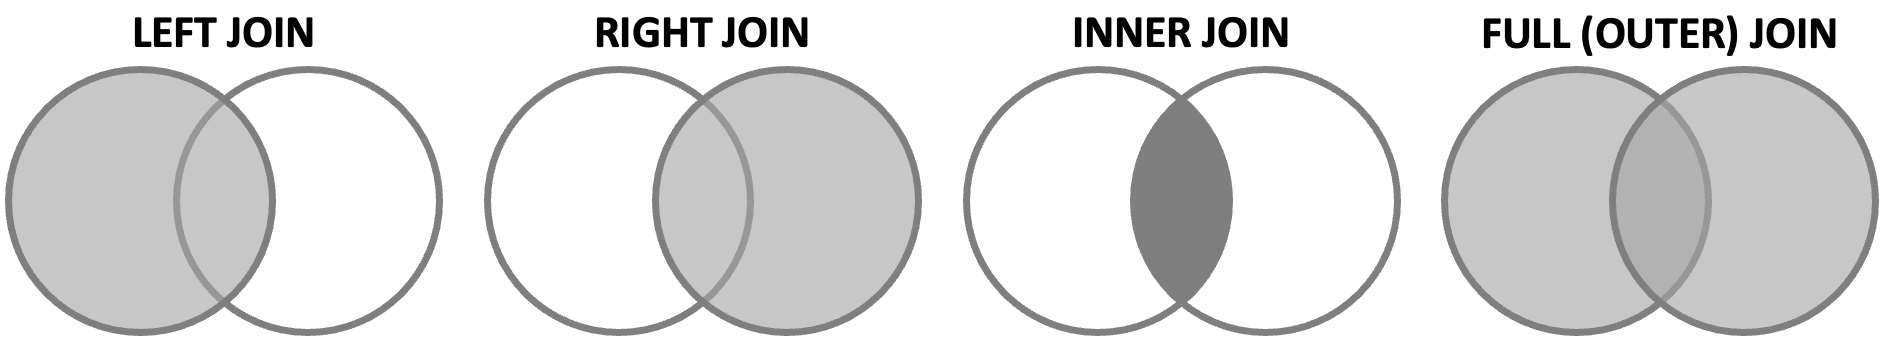

In [12]:
# Vamos selecionar todos os valores da tabela alunos fazendo o join com a tabela plataforma
aluno_plataforma = executa_sql('SELECT a.nome_aluno, a.[e-mail], p.acesso_plataforma, \
                               a.cod_matricula \
                               FROM alunos a \
                               LEFT JOIN plataforma p \
                               ON a.cod_matricula = p.cod_matricula')

(21, 4)


,nome_aluno,e-mail,acesso_plataforma,cod_matricula
0,Maria Eduarda da Rocha,maria@hashtag.com,0.0,38273
1,Bárbara da Cunha,barbara@hashtag.com,0.0,63546
2,Kevin Melo,kevin@hashtag.com,1.0,80515
3,Pedro Henrique da Costa,pedro@hashtag.com,1.0,68004
4,Mirella Viana,mirella@hashtag.com,1.0,28421


In [13]:
display(aluno_plataforma)

,nome_aluno,e-mail,acesso_plataforma,cod_matricula
0,Maria Eduarda da Rocha,maria@hashtag.com,0.0,38273
1,Bárbara da Cunha,barbara@hashtag.com,0.0,63546
2,Kevin Melo,kevin@hashtag.com,1.0,80515
3,Pedro Henrique da Costa,pedro@hashtag.com,1.0,68004
4,Mirella Viana,mirella@hashtag.com,1.0,28421
5,Lívia Jesus,lívia@hashtag.com,0.0,22284
6,Lara Lopes,lara@hashtag.com,1.0,38362
7,Lucca Cardoso,lucca@hashtag.com,1.0,45109
8,Isabelly Souza,isabelly@hashtag.com,1.0,31859
9,Cauã Porto,cauã@hashtag.com,0.0,42674


In [14]:
# Agora vamos fazer o join da tabela plataforma com a tabela aluno
plataforma_aluno = executa_sql('SELECT a.nome_aluno, a.[e-mail], p.acesso_plataforma, \
                               coalesce(a.cod_matricula,p.cod_matricula) as cod_matricula \
                               FROM plataforma p \
                               LEFT JOIN alunos a \
                               ON a.cod_matricula = p.cod_matricula')

(21, 4)


,nome_aluno,e-mail,acesso_plataforma,cod_matricula
0,Maria Eduarda da Rocha,maria@hashtag.com,0,38273
1,Bárbara da Cunha,barbara@hashtag.com,0,63546
2,Kevin Melo,kevin@hashtag.com,1,80515
3,Pedro Henrique da Costa,pedro@hashtag.com,1,68004
4,Mirella Viana,mirella@hashtag.com,1,28421


In [15]:
display(plataforma_aluno)

,nome_aluno,e-mail,acesso_plataforma,cod_matricula
0,Maria Eduarda da Rocha,maria@hashtag.com,0,38273
1,Bárbara da Cunha,barbara@hashtag.com,0,63546
2,Kevin Melo,kevin@hashtag.com,1,80515
3,Pedro Henrique da Costa,pedro@hashtag.com,1,68004
4,Mirella Viana,mirella@hashtag.com,1,28421
5,Lívia Jesus,lívia@hashtag.com,0,22284
6,Lara Lopes,lara@hashtag.com,1,38362
7,Lucca Cardoso,lucca@hashtag.com,1,45109
8,Isabelly Souza,isabelly@hashtag.com,1,31859
9,Cauã Porto,cauã@hashtag.com,0,42674


In [16]:
# Para fazer o full join, podemos exatamente pegar esses dois left joins e fazer um UNION
full_join = executa_sql('SELECT a.nome_aluno, a.[e-mail], p.acesso_plataforma, \
                               coalesce(a.cod_matricula,p.cod_matricula) as cod_matricula \
                               FROM plataforma p \
                               LEFT JOIN alunos a \
                               ON a.cod_matricula = p.cod_matricula \
                        UNION \
                        SELECT a.nome_aluno, a.[e-mail], p.acesso_plataforma, \
                               a.cod_matricula \
                               FROM alunos a \
                               LEFT JOIN plataforma p \
                               ON a.cod_matricula = p.cod_matricula')

(22, 4)


,nome_aluno,e-mail,acesso_plataforma,cod_matricula
0,None,None,0.0,91047
1,Antônio Azevedo,lovedogs@hashtag.com,0.0,29022
2,Bárbara Freitas,barbara@hashtag.com,0.0,19442
3,Bárbara da Cunha,barbara@hashtag.com,0.0,63546
4,Cauã Porto,cauã@hashtag.com,0.0,42674


In [17]:
# Visualizando o full join
display(full_join)

,nome_aluno,e-mail,acesso_plataforma,cod_matricula
0,None,None,0.0,91047
1,Antônio Azevedo,lovedogs@hashtag.com,0.0,29022
2,Bárbara Freitas,barbara@hashtag.com,0.0,19442
3,Bárbara da Cunha,barbara@hashtag.com,0.0,63546
4,Cauã Porto,cauã@hashtag.com,0.0,42674
5,Eloah Aragão,eloah@hashtag.com,1.0,65749
6,Francisco Pires,x!c0@hashtag.com,0.0,59518
7,Gabriela Costela,gabriela@hashtag.com,1.0,21262
8,Isabelly Souza,isabelly@hashtag.com,1.0,31859
9,Jorge Henrique Gomes,jorge@hashtag.com,NaN,89791
